In [4]:
import matplotlib.pyplot as plt
import hmf
from hmf.alternatives.wdm import MassFunctionWDM
from hmf.density_field.filters import SharpK, TopHat
from hmf.density_field.transfer_models import EH
import astropy
import numpy as np
import uvlfmc

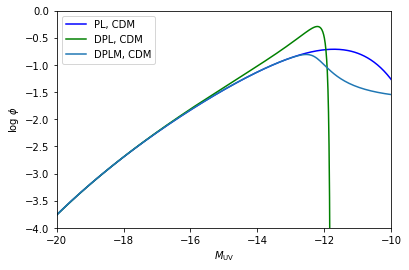

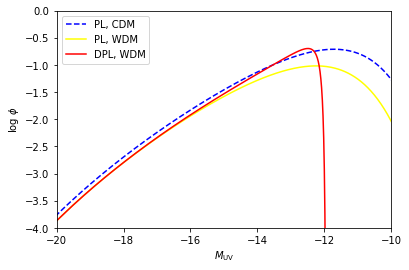

In [5]:
Muv_cdm_pl, phi_cdm_pl=uvlfmc.compute_LF( z=6, log10_ks=-1.6, a_s1=0.3, a_s2=0.3, log10_M_c=9., log10_M_t=9, HMF_name='ST', DM='CDM', mx=20, ind=1)
Muv_cdm_dpl, phi_cdm_dpl=uvlfmc.compute_LF( z=6, log10_ks=-1.3, a_s1=-0.99, a_s2=0.3, log10_M_c=9., log10_M_t=9, HMF_name='ST', DM='CDM', mx=20,ind=1 )
Muv_cdm_dplM, phi_cdm_dplM=uvlfmc.compute_LF( z=6, log10_ks=-1.9, a_s1=-0.3, a_s2=-10, log10_M_c=9., log10_M_t=9, HMF_name='ST', DM='CDM', mx=20, ind=-1)
Muv_wdm_pl, phi_wdm_pl=uvlfmc.compute_LF( z=6, log10_ks=-1.55, a_s1=0.3, a_s2=0.3, log10_M_c=9., log10_M_t=9, HMF_name='ST', DM='WDM', mx=3, ind=1)
Muv_wdm_dpl, phi_wdm_dpl=uvlfmc.compute_LF( z=6, log10_ks=-1.25, a_s1=-0.99, a_s2=0.3, log10_M_c=9., log10_M_t=9, HMF_name='ST', DM='WDM', mx=3, ind=1)

plt.plot(Muv_cdm_pl, np.log10(phi_cdm_pl), label='PL, CDM', color='blue')
plt.plot(Muv_cdm_dpl, np.log10(phi_cdm_dpl), label='DPL, CDM', color='green')
plt.plot(Muv_cdm_dplM, np.log10(phi_cdm_dplM), label='DPLM, CDM')


plt.ylim(-4,0)
plt.xlim(-20,-10)
plt.ylabel(r'log $\phi$')
plt.xlabel(r'$M_\mathrm{UV}$')

plt.legend()
plt.savefig('sketch_f_star_CDM.pdf')
plt.show()

plt.plot(Muv_cdm_pl, np.log10(phi_cdm_pl), label='PL, CDM', ls='--', color='blue')
plt.plot(Muv_wdm_pl, np.log10(phi_wdm_pl), label='PL, WDM', color='yellow')
plt.plot(Muv_wdm_dpl, np.log10(phi_wdm_dpl), label='DPL, WDM', color='red')
plt.ylim(-4,0)
plt.xlim(-20,-10)
plt.ylabel(r'log $\phi$')
plt.xlabel(r'$M_\mathrm{UV}$')

plt.legend()
plt.savefig('sketch_f_star_WDM.pdf')
plt.show()


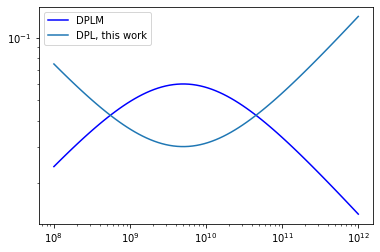

In [6]:
def f_starM(M_h,a_s1=3., a_s2=0.99, M_th=10**9):
    return 0.06*2/((M_h / M_th)**a_s1+(M_h / M_th)**a_s2)
def f_star(M_h,a_s1=3., a_s2=0.99, M_th=10**9):
    return 0.03*0.5*((M_h / M_th)**a_s1+(M_h / M_th)**a_s2)
M=np.logspace(8,12,80)
plt.loglog(M, f_starM(M,a_s1=0.4, a_s2=-0.4,M_th=5e9), color='blue', label='DPLM')
plt.loglog(M, f_star(M,a_s1=-0.4, a_s2=0.4,M_th=5e9),label='DPL, this work')
plt.savefig('sketch_f_star.pdf')

plt.legend()